# Implementacja algorytmu Dahbury i Massona identyfikacji zbioru niezdatnych węzłów sieci procesorów w systemie t-diagnozowalnym.

## Diagnostyka systemów komputerowych



## Pojęcia podstawowe

### System t-diagnozowalny
System t-diagnozowalny - system będący w stanie wykryć t-uszkodzeń, pod warunkiem, że t/2 >= N gdzie N jest całkowitą liczbą węzłów w systemie.

System jest jednokrokowo t–diagnozowalny, jeżeli wszystkie uszkodzone jednostki systemu mogą być zlokalizowane na podstawie jednego syndromu wyników testowania, o ile liczba aktualnie uszkodzonych jednostek nie przekracza t

System jest wielokrokowo t-diagnozowalny, jeżeli co najmniej jedna niezdatna jednostka może być zlokalizowana na podstawie jednego syndromu wyników testowania, o ile liczba aktualnie uszkodzonych jednostek nie przekracza t. 

### Graf t-diagnozowalny
Graf t-diagnozowalny to reprezentacja grafowa systemu t-diagnozowalnego reprezentowana przez graf skierowany.

𝐺 =⟨𝑉; 𝐸⟩ 

gdzie: 
𝑉 – proces systemu
𝐸 – podzbiór iloczynu kartezjańskiego 𝑉×𝑉 (krawędź skierowana pomiędzy dwoma wierzchołkami)


### Syndrom

Syndrom jest to wynik testu z przedziału {0,1} gdzie 0 oznacza sukces a 1 oznacza porażkę wraz z przypisaną krawędzią garfu t-diagnozowalnego.



## Algorytm Dahbury i Massona

Dany jest graf t-diagnozowalny G, przedstawiający przedział testów, oraz dany jest syndrom S.

Na podstawie G i S określany jest graf zwykły 

L(G,S) =⟨𝑉; 𝐸𝐿 ⟩ 

gdzie:

𝐸𝐿={(𝑒𝑖,𝑒𝑗 )|𝑒𝑗∈𝐿(𝑒𝑖)}  , a 𝐿(𝑒𝑖) jest zbiorem takich jednostek, które mogą być określone poprzez dedukcję jako niezdatne przy założeniu, że 𝑒𝑖 jest zdatna.

Po uzyskani grafu L(G), należy określić zbiory:

K*  - minimalny podzbiór węzłów (pokrycie) – każda krawędź grafu L jest incydentna z co najmniej jednym węzłem z K* (minimalny zbiór zewnętrznie stabilny)

M* - maksymalny podzbiór krawędzi stanowiący dopasowanie – każdy węzeł grafu L jest incydentny z co najwyżej jedną krawędzią M*

Następnie należy określić maksymalne skojarzenie zbiorów K* i M* - ostatecznie zbiór węzłów oznacza węzły uszkodzone, które należy wymienić.



# Wykorzystanie technologie

### Implementacja i rysowanie grafów
https://networkx.org/documentation/stable/index.html

https://matplotlib.org/stable/index.html


### Obliczenia macierzowe
https://numpy.org/doc/

### Liczby losowe
https://docs.python.org/3/library/random.html

### Wspomaganie iterowania danych
https://docs.python.org/3/library/itertools.html






In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import itertools

# Zaimplementowane funkcje


## `generate_graph(macierz)`

### Przeznaczenie:
Metoda generuje graf zwykły typu `networkx.Graph()` na podstawie podanej macierzy sąsiedztwa

### Input: 
macierz - typ `array` o wymarach `n x n`, reprezentująca macierz sąsiedztwa w grafie

### Return: 
graf zwykły typu `networkx.Graph()`

### Przykład użycia:


```
macierz_sasiedztwa = [
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0]
]

Graph = generate_graph(macierz_sasiedztwa)
```

In [ ]:
def generate_graph(macierz):
  G = nx.Graph()
  for i in range(len(macierz)):
      for j in range(i+1, len(macierz[i])):
          if macierz[i][j] == 1:
              G.add_edge(i, j)
  return G

## `generate_directed_graph(macierz)`

### Przeznaczenie:
Metoda generuje graf skerowany typu `networkx.DiGraph()` na podstawie podanej macierzy sąsiedztwa

### Input: 
macierz - typ `array` o wymarach `n x n`, reprezentująca macierz sąsiedztwa w grafie

### Return: 
graf skierowany typu `networkx.DiGraph()`

### Przykład użycia:


```
macierz_sasiedztwa = [
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0]
]

Graph = generate_directed_graph(macierz_sasiedztwa)
```

In [ ]:
def generate_directed_graph(macierz):
  G = nx.DiGraph()
  for i, row in enumerate(macierz):
      for j, val in enumerate(row):
          if val:
            G.add_edge(i, j)  
  return G

## `generate_syndrom_graph(macierz, damaged_nodes = [])`

### Przeznaczenie:
Metoda generuje graf skerowany typu `networkx.DiGraph()` na podstawie podanej macierzy sąsiedztwa, losuje syndrom i wpisuje go w graf w postaci wag krawędzi

### Input: 
macierz - typ `array` o wymarach `n x n`, reprezentująca macierz sąsiedztwa w grafie

damaged_nodes - typ `array`, reprezentuje uszkodzone węzły grafu 

### Return: 
Graph - graf skierowany typu `networkx.DiGraph()`, wraz z syndromem w postaci wag krawędzi

syndrom - macierz syndromu wygenerowana przez `generate_syndrom_matrix(macierz, damaged_nodes)`

### Przykład użycia:


```
macierz_sasiedztwa = [
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0]
]

uszkodzone_wezly = [1,3]

Graph, syndrom = generate_syndrom_graph(macierz_sasiedztwa, uszkodzone_wezly)
```

In [ ]:
def generate_syndrom_graph(macierz, damaged_nodes = []):
  G = nx.DiGraph()
  n , syndrom = generate_syndrom_matrix(macierz, damaged_nodes)
  for i, row in enumerate(macierz):
      for j, val in enumerate(row):
          if val:
            G.add_edge(i, j, weight = syndrom[i][j]) 
  return G, syndrom

## `print_graph(G, colored_edges = [], colored_nodes = [])`

### Przeznaczenie:
Metoda wyświetla graf `networkx.Graph()`

### Input: 
G - graf `networkx.Graph()`

colored_edges - typ `array`, który przechowuje krawędzie w postaci `tuple`, które mają być zaznaczone na czerwono

colored_nodes - typ `array`, który przechowuje numery wierzchołków, które mają być zaznaczone na czerwono

### Return: 
*nie dodyczy*

### Przykład użycia:


```
macierz_sasiedztwa = [
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0]
]

czerwone_krawedzie = [(0,1), (1,2)]
czerwone_wierzcholki = [3,4]

Graph = generate_graph(macierz_sasiedztwa)

print_graph(Graph, czerwone_krawedzie, czerwone_wierzcholki)
```

In [ ]:
def print_graph(G, colored_edges = [], colored_nodes = []):
  edge_colors = []
  for u, v in G.edges():
      if (u,v) in colored_edges or (v,u) in colored_edges:
          edge_colors.append("red")
      else:
          edge_colors.append("blue")
  
  node_colors = []
  for node in G.nodes():
      if node in colored_nodes:
          node_colors.append("red")
      else:
          node_colors.append("green")

  pos = nx.spring_layout(G, seed=42) 
  nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, arrows=True, arrowstyle="-")
  plt.show()

## `print_directed_graph(G, colored_edges = [], colored_nodes = [])`

### Przeznaczenie:
Metoda wyświetla graf `networkx.DiGraph()` wraz z wagami krawędzi, jeśli takie istnieją.

### Input: 
G - graf `networkx.DiGraph()`

colored_edges - typ `array`, który przechowuje krawędzie w postaci `tuple`, które mają być zaznaczone na czerwono

colored_nodes - typ `array`, który przechowuje numery wierzchołków, które mają być zaznaczone na czerwono

### Return: 
*nie dodyczy*

### Przykład użycia:


```
macierz_sasiedztwa = [
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0]
]

czerwone_krawedzie = [(0,1), (1,2)]
czerwone_wierzcholki = [3,4]

Graph = generate_graph(macierz_sasiedztwa)

print_directed_graph(Graph, czerwone_krawedzie, czerwone_wierzcholki)
```

In [ ]:
def print_directed_graph(G, colored_edges = [], colored_nodes = []):
  edge_colors = []
  for u, v in G.edges():
      if (u,v) in colored_edges:
          edge_colors.append("red")
      else:
          edge_colors.append("blue")
  
  node_colors = []
  for node in G.nodes():
      if node in colored_nodes:
          node_colors.append("red")
      else:
          node_colors.append("green")

  pos = nx.spring_layout(G, seed=42)  
  nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, arrows=True, arrowstyle="-|>")

  edge_labels = nx.get_edge_attributes(G, "weight")
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_weight="bold")

  plt.show()

## `minimal_vertex_cover(G):`

### Przeznaczenie:
Wyznaczenie przybliżonego minimalnego pokrycia wierzchołkowego grafu typu `networkx.Graph()`

### Input: 
G - graf `networkx.Graph()`

### Return: 
Numery wierzhołków w postaci `set()` 

### Przykład użycia:


```
macierz_sasiedztwa = [
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0]
]

Graph = generate_graph(macierz_sasiedztwa)
cover = minimal_vertex_cover(Graph)

```

In [ ]:
def minimal_vertex_cover(G):
    vertex_cover = set()
    edges = set(G.edges())

    while edges:
        u, v = edges.pop()

        vertex_cover.add(u)
        vertex_cover.add(v)

        edges -= set(G.edges(u)) | set(G.edges(v))

    return vertex_cover

## `minimal_vertex_cover_NP(G):`

### Przeznaczenie:
Wyznaczenie minimalnego pokrycia wierzchołkowego grafu typu `networkx.Graph()`

### Input: 
G - graf `networkx.Graph()`

### Return: 
Numery wierzchołków w postaci `set()` 

### Przykład użycia:


```
macierz_sasiedztwa = [
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0]
]

Graph = generate_graph(macierz_sasiedztwa)
cover = minimal_vertex_cover_NP(Graph)

```

In [ ]:
def is_vertex_cover(G, vertex_cover):
    for u, v in G.edges():
        if u not in vertex_cover and v not in vertex_cover:
            return False
    return True

def minimal_vertex_cover_NP(G):
    n = len(G.nodes())
    min_vertex_cover = None

    for k in range(1, n + 1):
        for combination in itertools.combinations(G.nodes(), k):
            vertex_cover = set(combination)

            if is_vertex_cover(G, vertex_cover):
                if min_vertex_cover is None or len(vertex_cover) < len(min_vertex_cover):
                    min_vertex_cover = vertex_cover
                    break
    return min_vertex_cover


## `maximal_matching(G):`

### Przeznaczenie:
Wyznaczenie maksymalnego dopasowania grafu typu `networkx.Graph()`

### Input: 
G - graf `networkx.Graph()`

### Return: 
Krawędzie reprezentowane jako para wierzchołków w postaci `set()` 

### Przykład użycia:


```
macierz_sasiedztwa = [
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0]
]

Graph = generate_graph(macierz_sasiedztwa)
cover = maximal_matching(Graph)

```

In [ ]:
def maximal_matching(G):
    matching = nx.maximal_matching(G)
    return matching

## `generate_syndrom_matrix(macierz, damaged_nodes = []):`

### Przeznaczenie:
Wyznaczenie syndromu grafu w postaci macierzy sąsiedztwa oraz listy uszkodzonych węzłów.

### Input: 
macierz - typ `array` o wymarach `n x n`, reprezentująca macierz sąsiedztwa w grafie

damaged_nodes - typ `array`, reprezentuje uszkodzone węzły grafu 

### Return: 
n - liczba węzłów w grafie
syndrom - macierz syndromu, gdzie -1 oznacza brak połączenia; 1 oznacza błąd; 0 oznacza brak błędu

### Przykład użycia:


```
macierz_sasiedztwa = [
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0]
]

uszkodzone_wezly = [1,3]
n, syndrom = generate_syndrom_matrix(macierz_sasiedztwa, uszkodzone_wezly)
```

In [ ]:
def generate_syndrom_matrix(macierz, damaged_nodes = []):
  G = generate_directed_graph(macierz)
  n = len(G.nodes())
  syndrom = -np.ones((n, n))
  for u, v in G.edges():
      if v in damaged_nodes:
        syndrom[u][v] = 1
      elif u in damaged_nodes:
        syndrom[u][v] = random.choice([0, 1])
      else:
        syndrom[u][v] = 0

  return n, syndrom
  

## `generate_deduction_matrix(syndrom)`

### Przeznaczenie:
Wyznaczenie grafu dedukcji.

### Input: 
syndrom - macierz syndromu, gdzie -1 oznacza brak połączenia; 1 oznacza błąd; 0 oznacza brak błędu

### Return: 
macierz sąsiedztwa grafu dedukcji 

### Przykład użycia:


```
macierz_sasiedztwa = [
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0]
]

uszkodzone_wezly = [1,3]
n, syndrom = generate_syndrom_matrix(macierz_sasiedztwa, uszkodzone_wezly)
graf_dedukcji = generate_deduction_matrix(syndrom)
```

In [ ]:
def generate_deduction_matrix(syndrom):
    for i in range(len(syndrom)):
      
      healthly = []
      ill = []
      unknow = []
      myself = i

      for j in range(len(syndrom[i])):
          if i == j: 
            syndrom[i][j] = 2
          if syndrom[i][j] == -1:
            unknow.append(j)
          if syndrom[i][j] == 0:
            healthly.append(j)
          if syndrom[i][j] == 1:
            ill.append(j)

      if len(healthly) == 0:
        healthly = unknow
        unknow = []

      while len(unknow) > 0:
        h = healthly.pop()
        healthly.append(h)
        x = unknow.pop(0)

        if syndrom[h][x] == -1:
          unknow.append(x)
          h = healthly.pop(0)
          healthly.append(h)
        if syndrom[h][x] == 0:
          healthly.append(x)
        if syndrom[h][x] == 1:
          ill.append(x)

      for j in healthly:
        syndrom[i][j] = 0
      for j in ill:
        syndrom[i][j] = 1
        syndrom[j][i] = 1
      syndrom[i][i] = 0
    
    return syndrom

## `resolve_result(K, M)` 

### Przeznaczenie:
Wyznaczenie skojarzenia minimalnego pokrycia wierzchołkowego oraz maksymalnego dopasowania.

### Input: 
K - zbiór wierzchołków w postaci `set()`
M - zbiór krawędzi reprezentowane w postaci par wierzchołków w postaci `set()` 

### Return: 
Skojarzenie zbioró K i M

### Przykład użycia:

```
K = {1, 3, 5}
M = {(0, 1), (3, 2), (5, 4)}

result = resolve_result(K, M)
```

In [ ]:
def resolve_result(K, M):
  vertices_from_edges = set()
  for edge in M:
      vertices_from_edges.update(edge)
  intersection = K.intersection(vertices_from_edges)
  return intersection

# Poligon - wykorzystanie zbudowanego pakietu funckji

## Przykłady grafów t-diagnozowalnych

### Draf 2-diagnozowalny

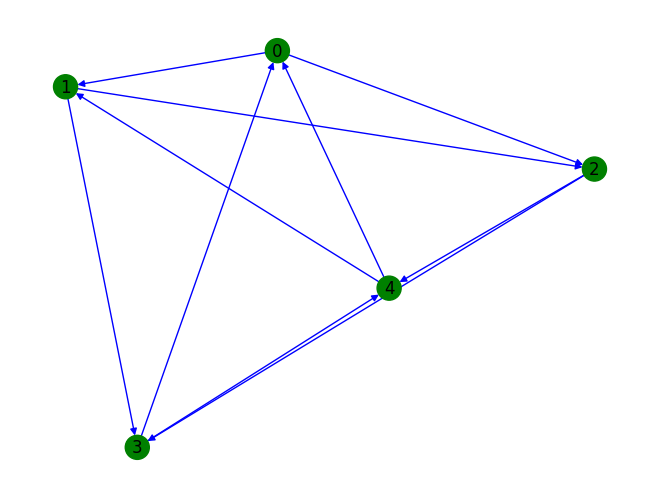

In [ ]:
example = [
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0]
]

### Graf 3-diagnozowalny
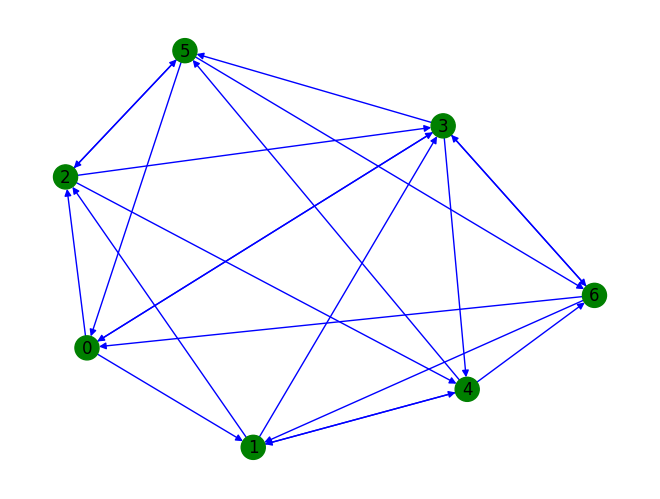

In [ ]:
example = [
    [0, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 0],
    [1, 0, 0, 0, 1, 1, 1],
    [0, 1, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 0, 0, 1],
    [1, 1, 0, 1, 0, 0, 0]
]

## Wybór uszkodzonych węzłów

Należy pamiętać, że ilość uszkodzonych krawędzi nie może być większa niż t z wybranego grafu

In [ ]:
damaged = [1,3]

### Wyświetlenie wybranego grafu z uszkodzonymi węzłami

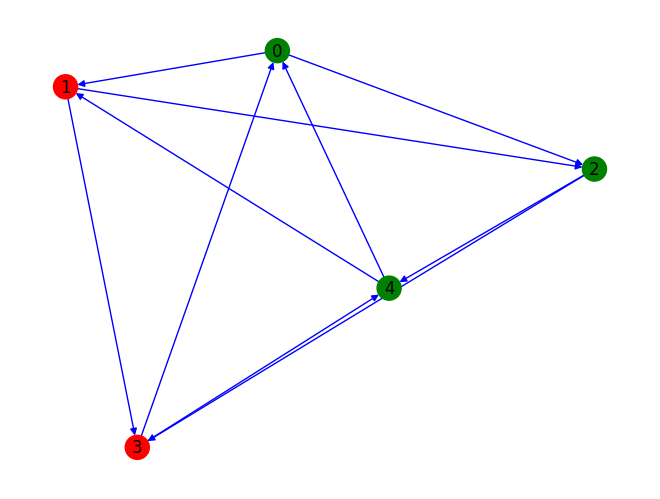

In [ ]:
Example = generate_directed_graph(example)
print_directed_graph(Example, colored_nodes = damaged)

## Wyznaczenie syndromu grafu
Syndorm wyznaczany jest za pomocą nasyępującego algorytmu:
*   Jeżeli połączenie między wierzchołkami nie istnieje: -1
*   Jeżeli wierzchołek początkowy jest sprawny i końcowny jest sprawny: 0
*   Jeżeli wierzchołek początkowy jest sprawny i końcowny jest uszkodzony: 1
*   Jeżeli wierzchołek początkowy jest uszkodzony: losuj z pa= 0.5 wartość 0 lub 1 





In [ ]:
Syndrom, syndrom = generate_syndrom_graph(example, damaged)
print(syndrom)

[[-1.  1.  0. -1. -1.]
 [-1. -1.  0.  1. -1.]
 [-1. -1. -1.  1.  0.]
 [ 1. -1. -1. -1.  1.]
 [ 0.  1. -1. -1. -1.]]


### Wyświetlenie grafu z syndromem

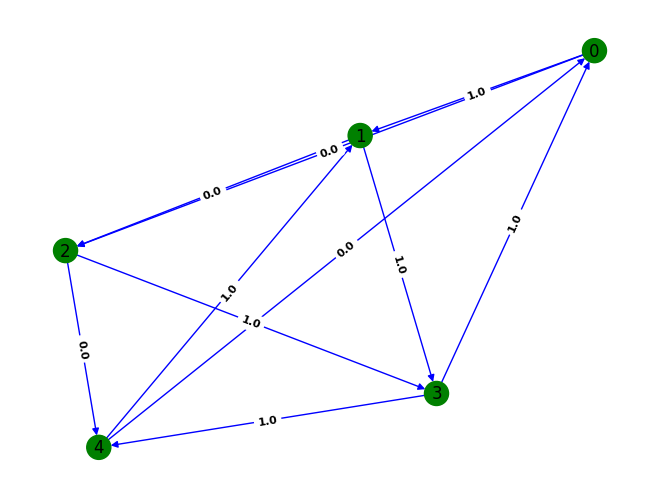

In [ ]:
print_directed_graph(Syndrom)

## Algorytm Dahbury i Massona

### Wyznaczenie grafu dedukcji na podstawie sybdromu

In [ ]:
deductionMatrix = generate_deduction_matrix(syndrom)
print(deductionMatrix)
LGraph = generate_graph(deductionMatrix)

[[0. 1. 0. 1. 0.]
 [1. 0. 1. 1. 1.]
 [0. 1. 0. 1. 0.]
 [1. 1. 1. 0. 1.]
 [0. 1. 0. 1. 0.]]


#### Wyświetlenie L-Grafu

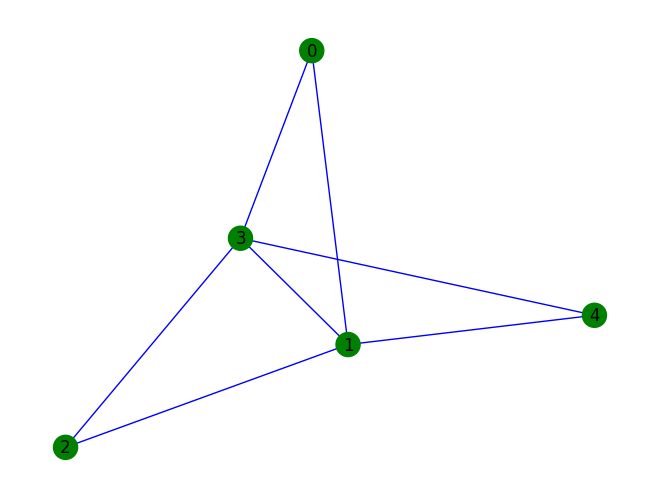

In [ ]:
print_graph(LGraph)

### Wyznaczenie zbioru K

In [ ]:
K = minimal_vertex_cover_NP(LGraph)
print(K)

{1, 3}


#### Wyświetlenie zbioru K na grafie dedukcji.

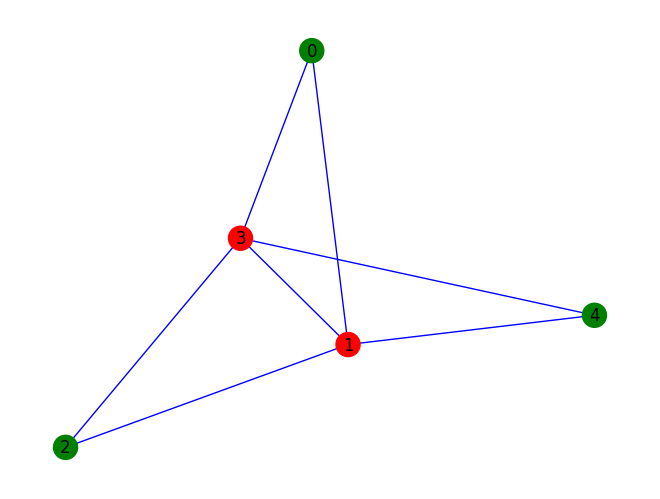

In [ ]:
print_graph(LGraph, colored_nodes = K)

### Wyznaczenie zbioru M

In [ ]:
M = maximal_matching(LGraph)
print(M)

{(0, 1), (3, 2)}


#### Wyświetlenie zbioru M na grafie dedukcji

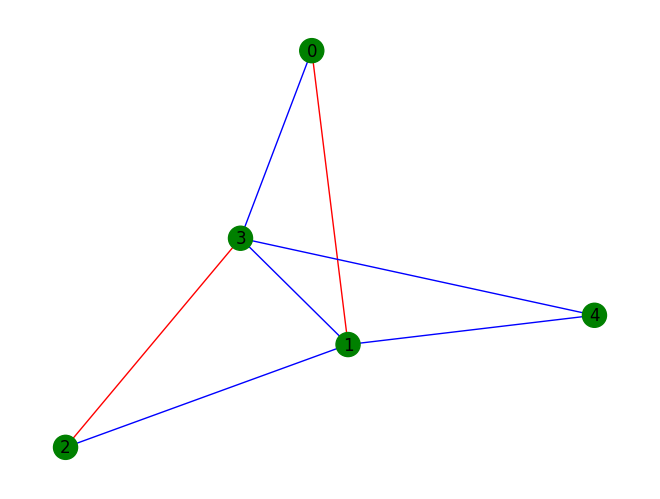

In [ ]:
print_graph(LGraph, colored_edges = M)

### Wyznaczenie zbioru wierzchołków uszkodzonych


In [ ]:
result = resolve_result(K,M)
print("Uszkodzone węzły: ")
print(damaged)
print("Wykryte uszkodzenia: ")
print(result)

Uszkodzone węzły: 
[1, 3]
Wykryte uszkodzenia: 
{1, 3}
